In [13]:
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns 
from sklearn.model_selection import train_test_split
from sklearn.datasets import fetch_california_housing
import statsmodels.api as sm

In [14]:
data = fetch_california_housing()
df = pd.DataFrame(data.data, columns = data.feature_names)

In [15]:
df["Target"] = data.target
X,y = df.drop("Target", axis=1), df["Target"]

In [16]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2)

In [17]:
X_train_const = sm.add_constant(X_train)
X_test_const = sm.add_constant(X_test)

model = sm.OLS(y_train, X_train_const).fit()

In [21]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Target   R-squared:                       0.606
Model:                            OLS   Adj. R-squared:                  0.606
Method:                 Least Squares   F-statistic:                     3178.
Date:                Mon, 14 Apr 2025   Prob (F-statistic):               0.00
Time:                        18:33:06   Log-Likelihood:                -18064.
No. Observations:               16512   AIC:                         3.615e+04
Df Residuals:                   16503   BIC:                         3.622e+04
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        -36.7514      0.739    -49.737      0.000     -38.200     -35.303
MedInc         0.4394      0.005     92.069      0.000       0.430       0.449
HouseAge       0.0093      0.000     18.628      0.000       0.008       0.010
AveRooms      -0.1156      0.007    -17.058      0.000      -0.129      -0.102
AveBedrms      0.6680      0.032     21.125      0.000       0.606       0.730
Population -1.743e-06   5.25e-06     -0.332      0.740    -1.2e-05    8.54e-06
AveOccup      -0.0048      0.001     -8.378      0.000      -0.006      -0.004
Latitude      -0.4185      0.008    -51.890      0.000      -0.434      -0.403
Longitude     -0.4322      0.008    -51.181      0.000      -0.449      -0.416
==============================================================================
Omnibus:                     3574.994   Durbin-Watson:                   1.981
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            11867.428
Skew:                           1.088   Prob(JB):                         0.00
Kurtosis:                       6.538   Cond. No.                     2.41e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.41e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [22]:
y_pred = model.predict(X_test_const)
y_pred

16833    2.611318
2985     1.142664
3079     1.215816
13383    1.998516
12778    0.782765
           ...   
1272     2.153926
13128    1.312353
17437    2.564084
16534    1.764881
15632    2.259756
Length: 4128, dtype: float64

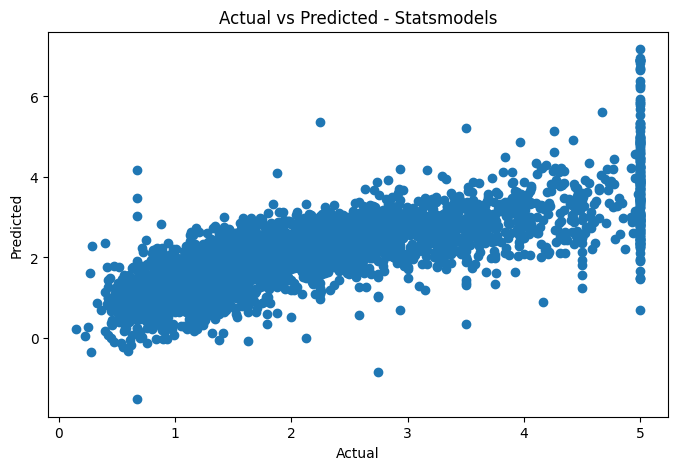

In [23]:
plt.figure(figsize=(8,5))
plt.scatter(y_test, y_pred)
plt.xlabel("Actual")
plt.ylabel("Predicted")
plt.title("Actual vs Predicted - Statsmodels")
plt.show()